<a href="https://colab.research.google.com/github/AkashSalmuthe/Airbnb-Bookings-Analysis---Akash-Salmuthe/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# Load The Dataset

path = '/content/drive/MyDrive/Capstone Projects/Exploratory Data Analysis/Airbnb Bookings Analysis - Akash Salmuthe/'
df = pd.read_csv(path +'Airbnb NYC 2019.csv')

# **Exploaration of Dataset**

In [54]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [55]:
#df.duplicated()
df.duplicated().sum()

0

In [56]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [57]:
df.shape

(48895, 16)

In [58]:
# df.describe(include=object)

# df.describe()  only gives numerical columns while including object reflects categorical columns

df.describe()       


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# **Dataset Overview**

* In this dataset, there are 48895 entries and 16 features (Columns )
* 10 out of 16 are numeric:
  ['id', 'host_id', 'latitude', 'longitude', price, 'number_of_reviews' 'reviews_per_month', 'calculated_host_listings_count', 'availability_365' ]

* 6 out of 16 are categorical: [ 'name', 'host_name', 'neighbourhood_group' 'neighbourhood','room_type','minimum_nights', 'last_review']

**Looking For NaN/Null/Missing Values**

In [60]:
#Checking Null Values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


As we can see that columns like reviews_per_month has 10052 missing value or can say that null values. it is very important feature for data analysis. On other hand columns like name, last review also has missing values but  we can drop it from dataset

# **Handling null values**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


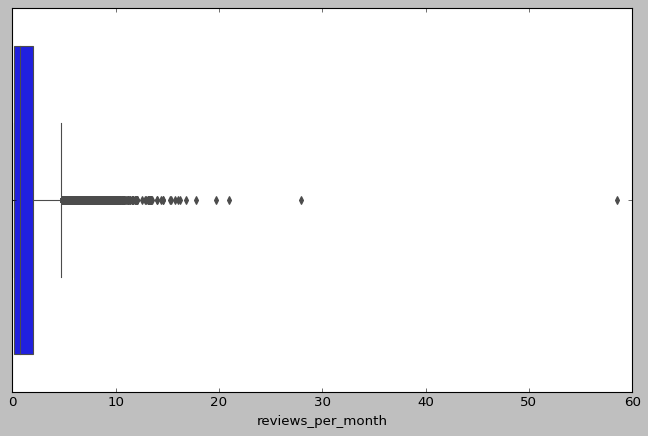

In [61]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(df.reviews_per_month )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


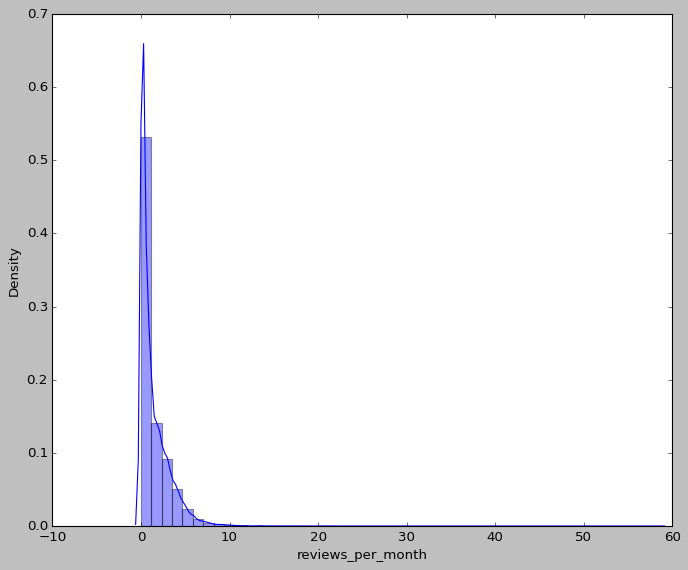

In [63]:
fig, ax = plt.subplots(figsize=(10,8))
sns.distplot(df.reviews_per_month )
plt.show()

## *Observation*

By the observing the box plot and df.describe we can see that feature reviews_per_month is slightly right skewed it always recomended that use median for skewed data. here we can use median as well as mean for replacing missing values.

## **What can we learn about different hosts and areas?**

In [64]:
hosts_areas = df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
hosts_areas.sort_values(by='calculated_host_listings_count', ascending=False).head(5)

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,327
1834,Blueground,Manhattan,232
1833,Blueground,Brooklyn,232
7275,Kara,Manhattan,121
7480,Kazuya,Queens,103


#### As we can see most number of listings are from **Manhattan** created Sonder (NYC), Blueground, Michael, David	

## **What can we learn from predictions? (ex: locations, prices, reviews, etc)**

In [65]:
areas_reviews = df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
areas_reviews

,neighbourhood_group,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


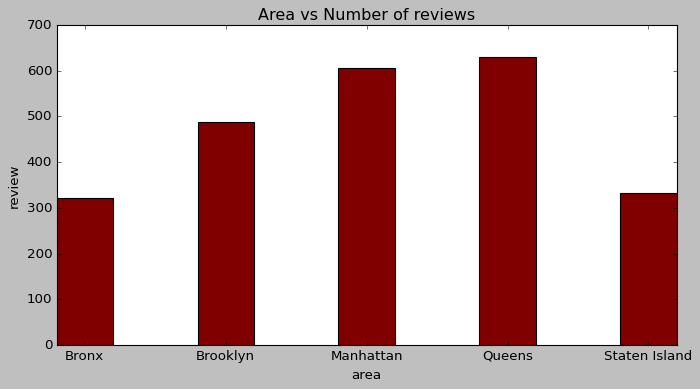

In [69]:
area = areas_reviews['neighbourhood_group']
review = areas_reviews['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(area, review, color ='maroon',
        width = 0.4)
 
plt.xlabel("area")
plt.ylabel("review")
plt.title("Area vs Number of reviews")
plt.show()

In [70]:
price_area = df.groupby(['price'])['number_of_reviews'].max().reset_index()
price_area.head(5)

,price,number_of_reviews
0,0,95
1,10,93
2,11,113
3,12,8
4,13,9


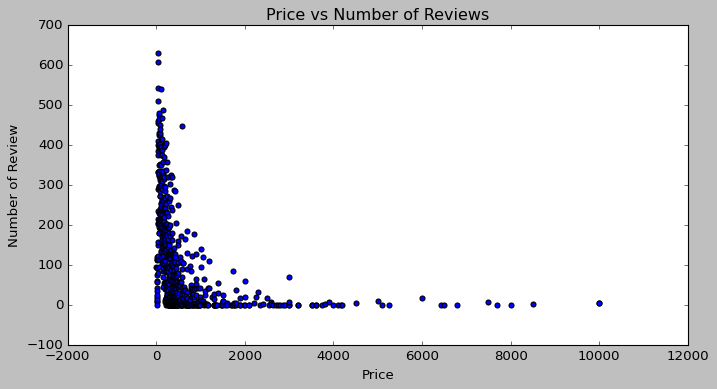

In [71]:
area = price_area['price']
price = price_area['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.scatter(area, price)
 
plt.xlabel("Price")
plt.ylabel("Number of Review")
plt.title("Price vs Number of Reviews")
plt.show()

####From the above Analysis we can say that most people prefer to stay in place where price is less.

##**Which hosts are the busiest and why?**

In [72]:
busiest_hosts = df.groupby(['host_name','host_id','room_type'])['number_of_reviews'].max().reset_index()
busiest_hosts = busiest_hosts.sort_values(by='number_of_reviews', ascending=False).head(10)
busiest_hosts

,host_name,host_id,room_type,number_of_reviews
10279,Dona,47621202,Private room,629
17708,Jj,4734398,Private room,607
25566,Maya,37312959,Private room,543
6235,Carol,2369681,Private room,540
8947,Danielle,26432133,Private room,510
3950,Asa,12949460,Entire home/apt,488
37748,Wanda,792159,Private room,480
22499,Linda,2680820,Private room,474
8625,Dani,42273,Entire home/apt,467
2942,Angela,23591164,Private room,466


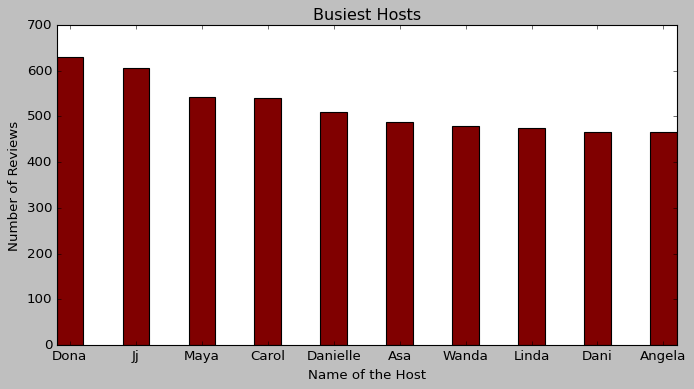

In [73]:
name = busiest_hosts['host_name']
reviews = busiest_hosts['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(name, reviews, color ='maroon',
        width = 0.4)
 
plt.xlabel("Name of the Host")
plt.ylabel("Number of Reviews")
plt.title("Busiest Hosts")
plt.show()

####Busiest hosts are: 
1. Dona
2. Ji
3. Maya
4. Carol
5. Danielle

####Because these hosts listed room type as Entire home and Private room which is preferred by most number of people.

## **Traffic among different areas and what could be the reason for it?**

In [74]:
traffic_areas = df.groupby(['neighbourhood_group','room_type'])['minimum_nights'].count().reset_index()
traffic_areas = traffic_areas.sort_values(by='minimum_nights', ascending=False)
traffic_areas

,neighbourhood_group,room_type,minimum_nights
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


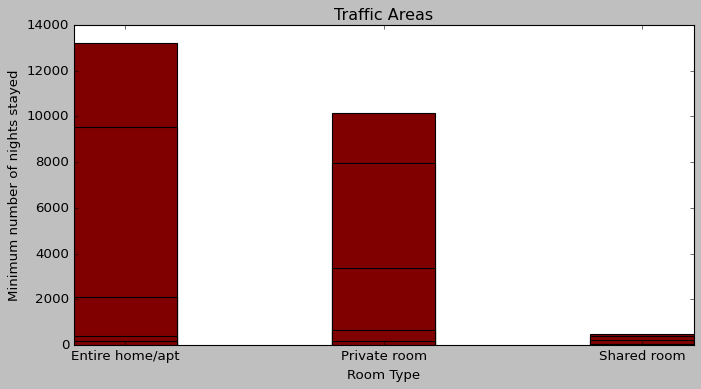

In [75]:
room_type = traffic_areas['room_type']
stayed = traffic_areas['minimum_nights']

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(room_type, stayed, color ='maroon',
        width = 0.4)
 
plt.xlabel("Room Type")
plt.ylabel("Minimum number of nights stayed")
plt.title("Traffic Areas")
plt.show()

#### From the Above Analysis We can Stay that People are preferring Entire home/apt or Private room which are present in Manhattan, Brooklyn, Queens and people are preferring listings which are less in price.






In [76]:
# Dropiing the colunms
df.drop(columns=['host_name', 'last_review','name'],inplace=True)

In [77]:
# df['reviews_per_month'].fillna(df['reviews_per_month'].mean(),inplace=True)
df['reviews_per_month'].fillna(df['reviews_per_month'].median(),inplace=True)

In [78]:
df.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# **Outliers**

Outliers plays very important role while decision making. It's important outliers should not be present in dataset if they are necessary action must taken.

# looking For outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


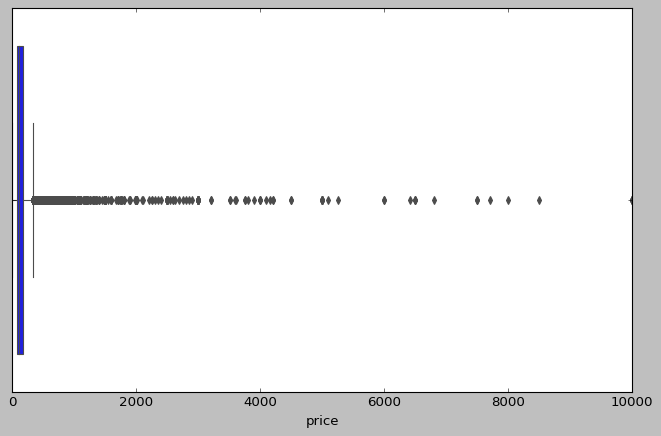

In [79]:
#checking for outliers

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(df['price'])

As we can see that their outliers are present, we handled outliers

## Outliers treatment

In [80]:
# Inter Quartile Range

Q1 = np.percentile(df['price'],25)
Q2 = np.percentile(df['price'],50)
Q3 = np.percentile(df['price'],75)
IQR =  Q3 - Q1
a=Q1-(1.5*IQR)
b=Q3+(1.5*IQR)
df=df[(df['price']<b) & (df['price']>a)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


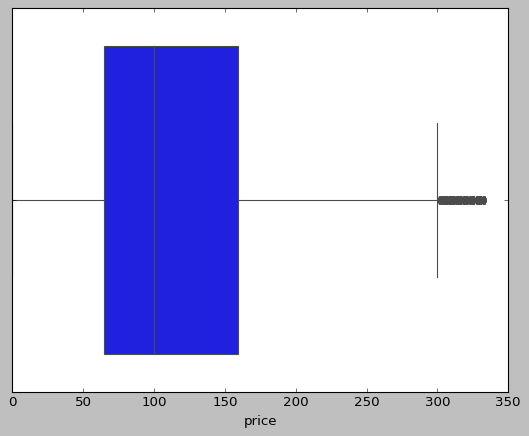

In [81]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(df['price'])

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45918 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              45918 non-null  int64  
 1   host_id                         45918 non-null  int64  
 2   neighbourhood_group             45918 non-null  object 
 3   neighbourhood                   45918 non-null  object 
 4   latitude                        45918 non-null  float64
 5   longitude                       45918 non-null  float64
 6   room_type                       45918 non-null  object 
 7   price                           45918 non-null  int64  
 8   minimum_nights                  45918 non-null  int64  
 9   number_of_reviews               45918 non-null  int64  
 10  reviews_per_month               45918 non-null  float64
 11  calculated_host_listings_count  45918 non-null  int64  
 12  availability_365                

## **Exploration Data and Visualizing**

Now time to explore our data and visualize it to recognize the relationship between the dataset.

### Finding Correlation 

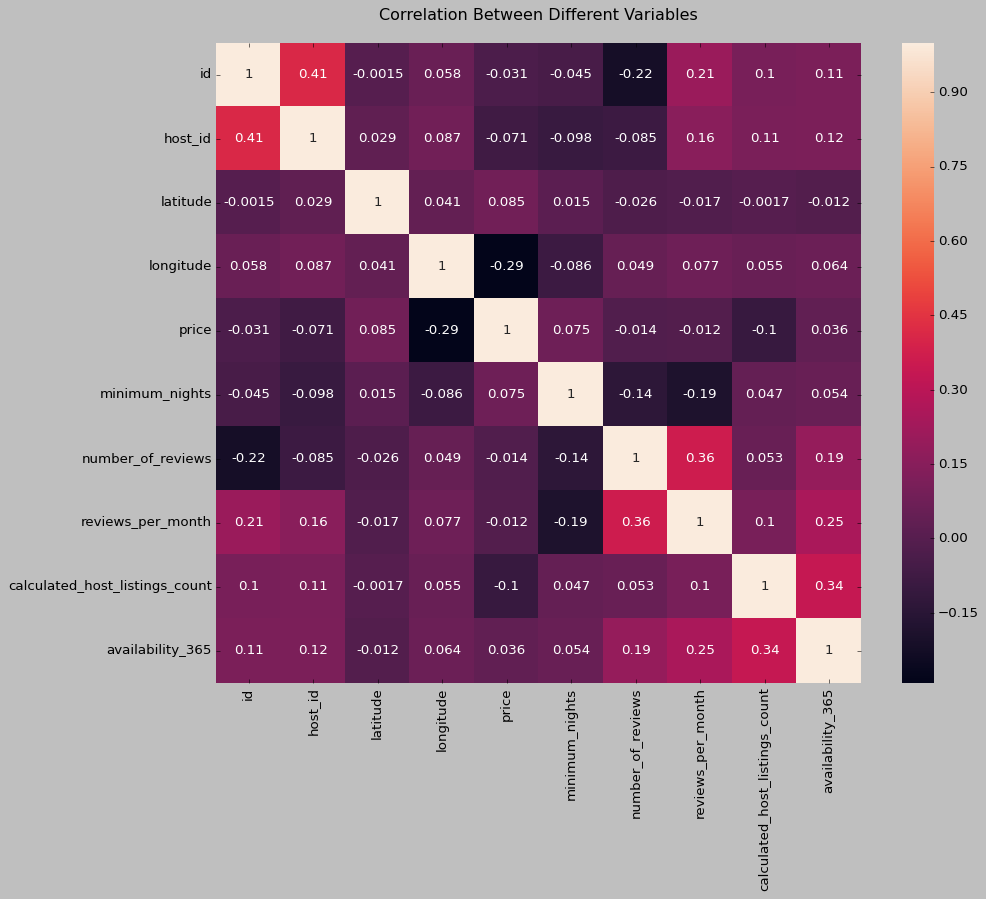

In [83]:
corr = df.corr(method='kendall')
plt.figure(figsize=(13,10))
plt.title("Correlation Between Different Variables\n")
sns.heatmap(corr, annot=True)
plt.show()

From the graph above, we know that there is not a strong correlation except review_per_month and number_of_review

## **Neighbourhood Group**

In [84]:
ng = df['neighbourhood_group'].value_counts()
ng

Manhattan        19501
Brooklyn         19415
Queens            5567
Bronx             1070
Staten Island      365
Name: neighbourhood_group, dtype: int64

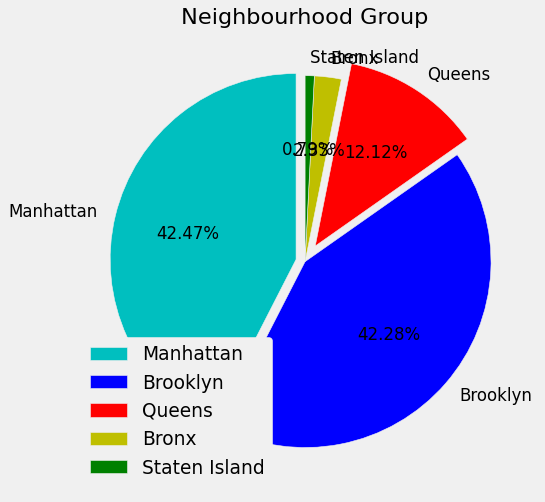

In [93]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group")

colors = ['c','b','r','y','g']
textprops = {'fontsize':15}
explode=[0.05,0,0.1,0,0]

g = plt.pie(ng, labels=ng.index,explode=explode,colors=colors,autopct='%0.2f%%',shadow=False,startangle=90,textprops=textprops)
plt.legend(loc=3)
plt.show()

from this map of Neighborhood Group, it shows that Airbnb Listings in Newyork are near Manhattan, and Brooklyn has the highest share of hotels.

## **By Room Type**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


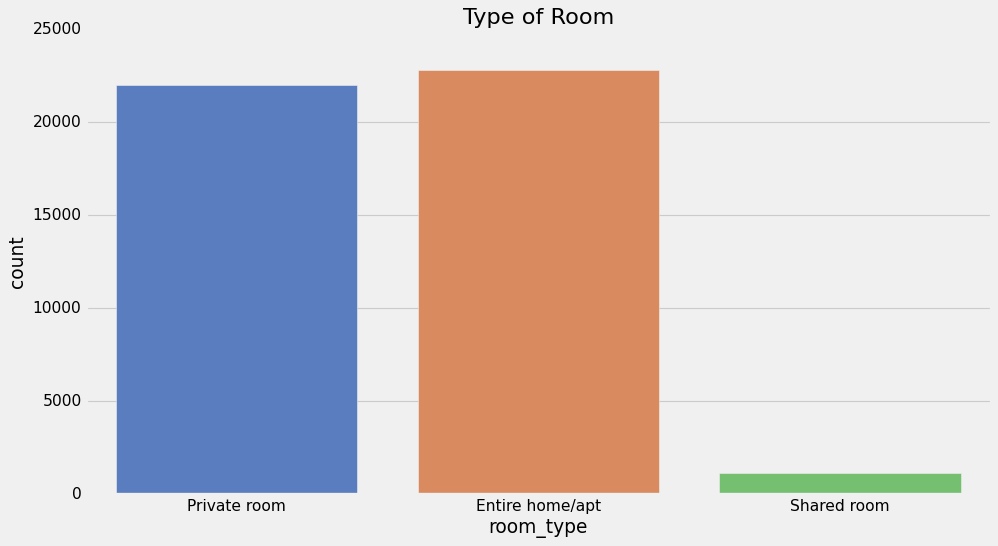

In [94]:
plt.figure(figsize=(13,7))
plt.title("Type of Room")
sns.countplot(df.room_type, palette="muted")
fig = plt.gcf()
plt.show()

We can see that the Entire Home/Apartment has the highest share, followed by the Private Room, and the least preferred is Shared Room.

## **Room Types occupied by a neighborhood group**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


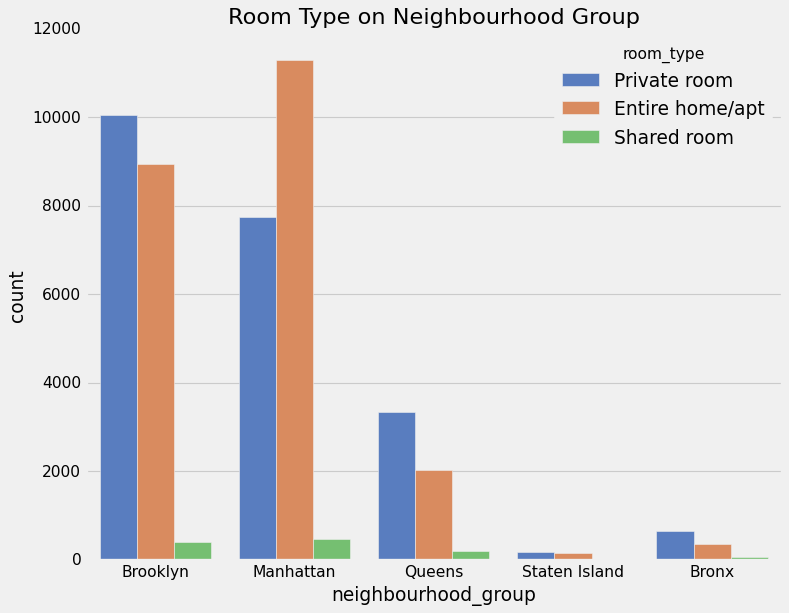

In [95]:
plt.figure(figsize=(10,8))
plt.title("Room Type on Neighbourhood Group")
sns.countplot(df['neighbourhood_group'],hue=df['room_type'],palette="muted")
plt.show()

The graph shows that the Entire Home/Apartment is listed most near Manhattan, while Private Rooms and Apartments Near Brooklyn are Nearly equal.

## **Neighbourhood Group vs. Availability Room**

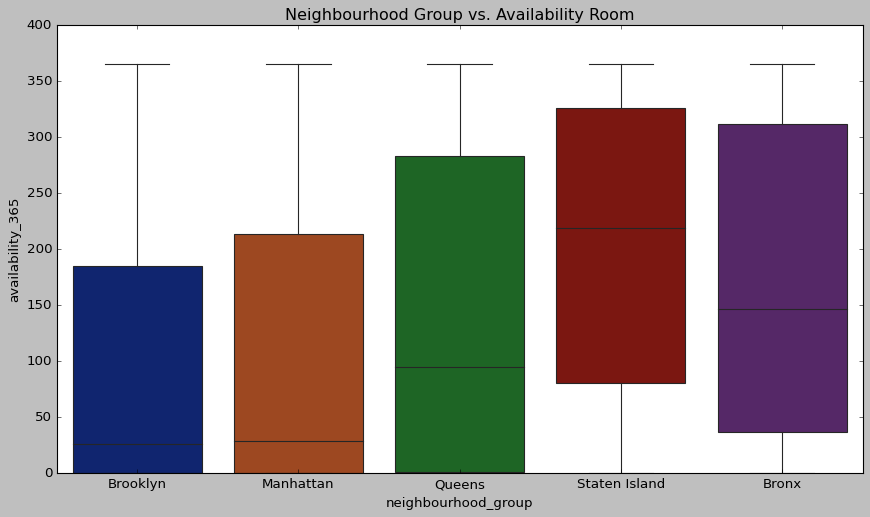

In [96]:
plt.style.use('classic')
plt.figure(figsize=(13,7))
plt.title("Neighbourhood Group vs. Availability Room")
sns.boxplot(data=df, x='neighbourhood_group',y='availability_365',palette="dark")
plt.show()

The graph above shows the relationship between the availability room and neighborhood group.

## **Neighbourhood Group Price Distribution**

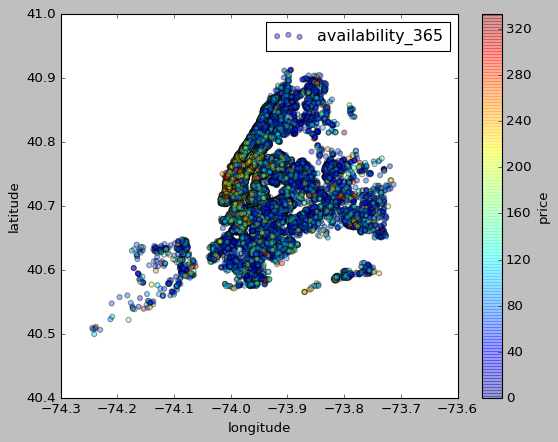

In [97]:
#plt.figure(figsize=(15,10))
#plt.title("Map of Price Distribution")
ax=df[df.price<500].plot(kind='scatter', x='longitude',y='latitude',label='availability_365',c='price',cmap=plt.get_cmap('jet'),colorbar=True,alpha=0.4)
ax.legend()
plt.ioff()
plt.show()

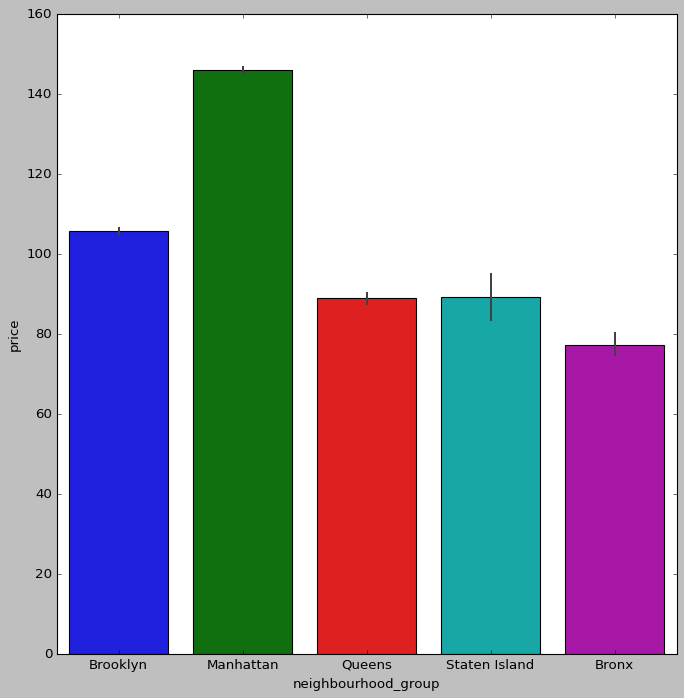

In [98]:
plt.figure(figsize=(10,10))
sns.barplot(data=df, x='neighbourhood_group', y='price')

#### **Prices with respect to Different Regions**

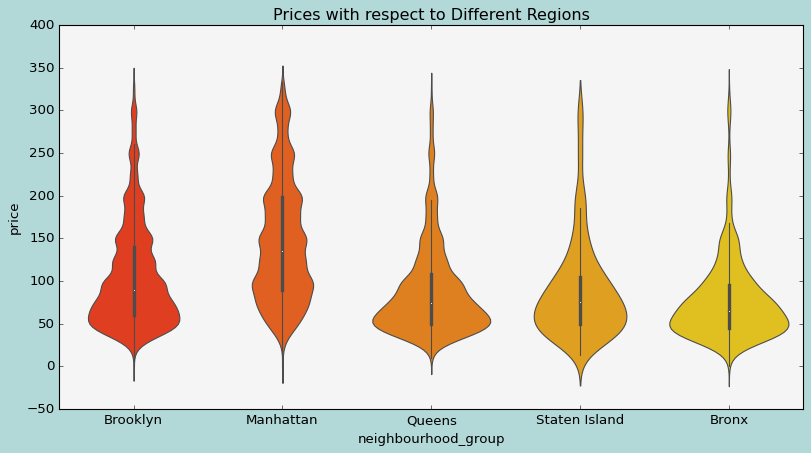

In [99]:
price_range= df[df.price < 600 ]
fig, ax = plt.subplots(figsize = (12,6))
fig.patch.set_facecolor('#b2d8d8')
ax.set_facecolor('#f6f5f5')

plt_2=sns.violinplot(x='neighbourhood_group',y='price', data= price_range,palette='autumn')
plt_2.set_title('Prices with respect to Different Regions');

* We can see that the Manhattan region has a more expensive room price.
* where as Brooklyn, Queens and Bronx has low prices room.

# **latitude and longitude of each listing**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


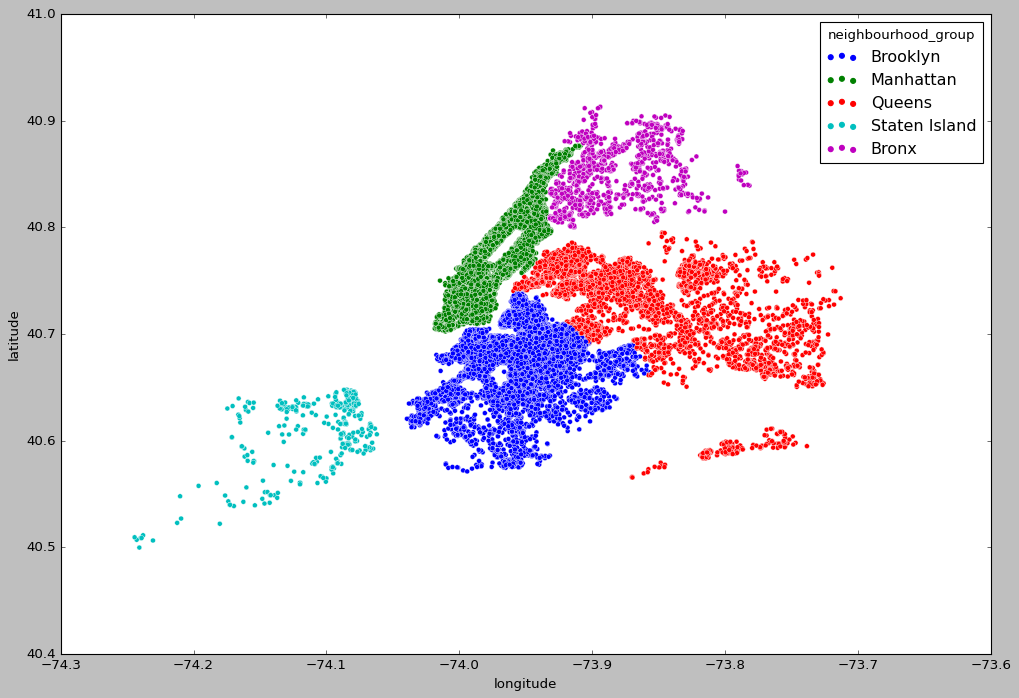

In [100]:
plt.figure(figsize=(15,10))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.ioff()

## **Review Vs Price**

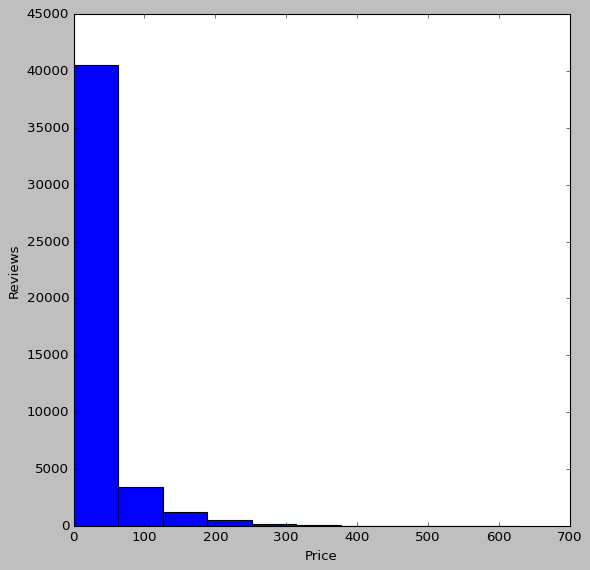

In [101]:
plt.figure(figsize=(8,8))
df['number_of_reviews'].plot(kind='hist')
plt.xlabel("Price")
plt.ylabel("Reviews")
plt.ioff()
plt.show()

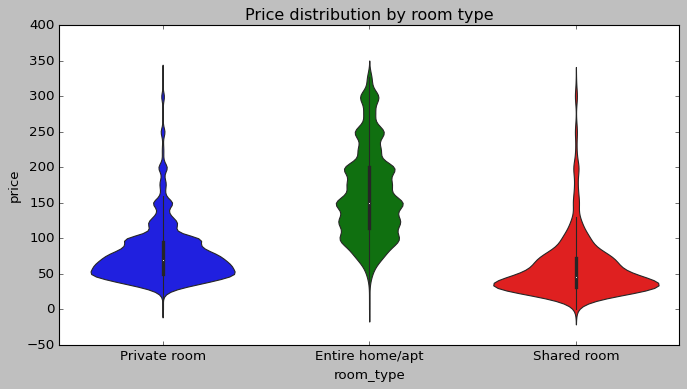

In [102]:
#price distribution according to different room types

plt.figure(figsize=(10,5))
vio_plt=sns.violinplot(data=df, x='room_type', y='price')
vio_plt.set_title('Price distribution by room type')
plt.show()

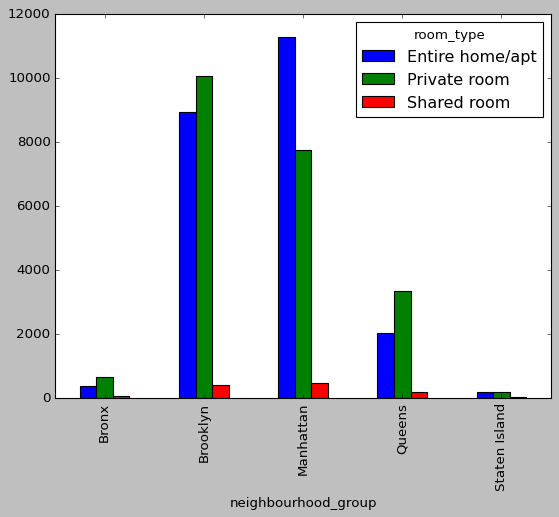

In [103]:
room_ng=df.groupby(['neighbourhood_group','room_type'])['neighbourhood_group'].count().unstack()
room_ng.plot(kind='bar')

Price range varies from different room type, as expected shared room have high price range. Private rooms and shared rooms price range are more centered around their mean.

### **Inference for neighbourhoods and hosts in various neighbourhood groups**

In [104]:
Manhattan=df.loc[df['neighbourhood_group']=='Manhattan'].reset_index()
Manhattan.drop(['index'], axis=1,inplace= True)

<BarContainer object of 10 artists>

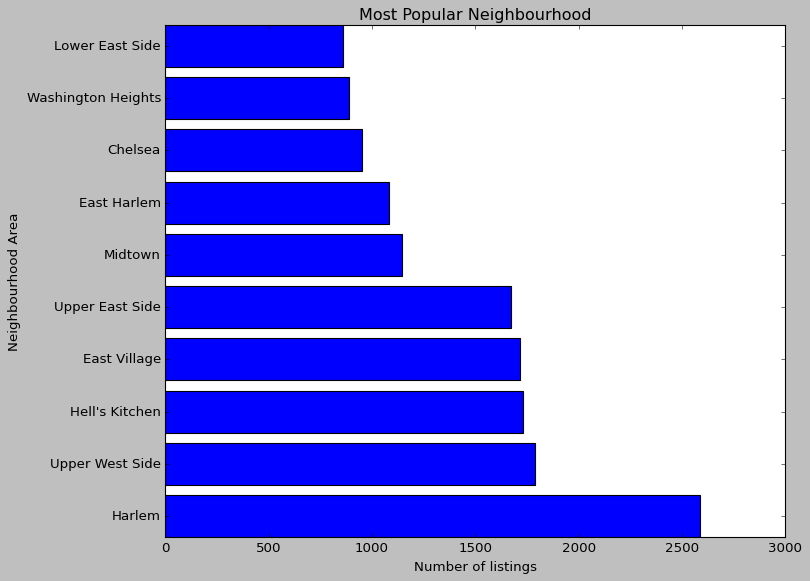

In [105]:
data = Manhattan.neighbourhood.value_counts().head(10)

plt.figure(figsize=(10, 8))
x = list(data.index)
y = list(data.values)

plt.title("Most Popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of listings")

plt.barh(x, y)

In [106]:
Bronx=df.loc[df['neighbourhood_group']=='Bronx'].reset_index()
Bronx.drop(['index'], axis=1,inplace= True)

<BarContainer object of 10 artists>

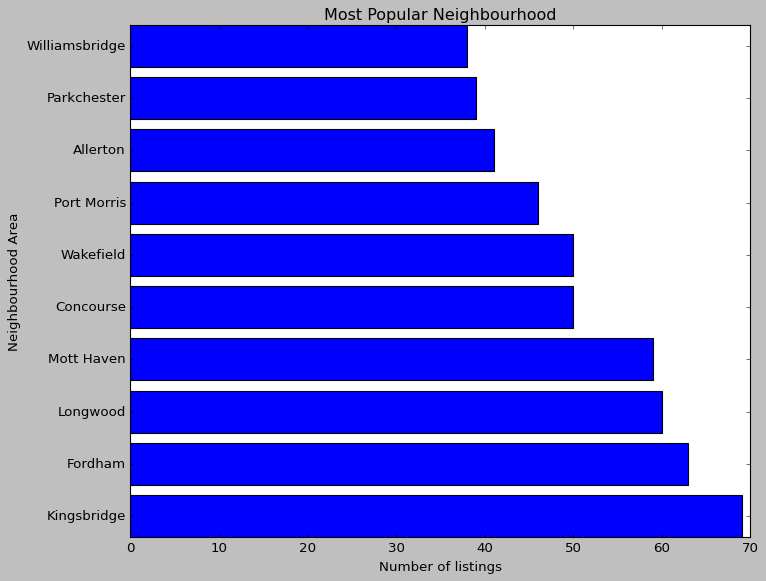

In [107]:
data = Bronx.neighbourhood.value_counts().head(10)

plt.figure(figsize=(10, 8))
x = list(data.index)
y = list(data.values)

plt.title("Most Popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of listings")

plt.barh(x, y)

<BarContainer object of 10 artists>

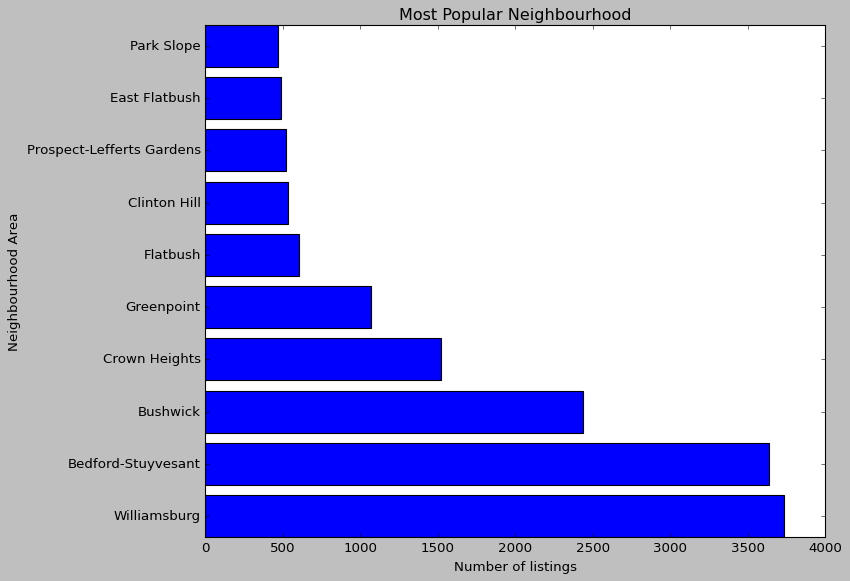

In [108]:
Brooklyn=df.loc[df['neighbourhood_group']=='Brooklyn'].reset_index()
Brooklyn.drop(['index'], axis=1,inplace= True)

data = Brooklyn.neighbourhood.value_counts().head(10)

plt.figure(figsize=(10, 8))
x = list(data.index)
y = list(data.values)

plt.title("Most Popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of listings")

plt.barh(x, y)

<BarContainer object of 10 artists>

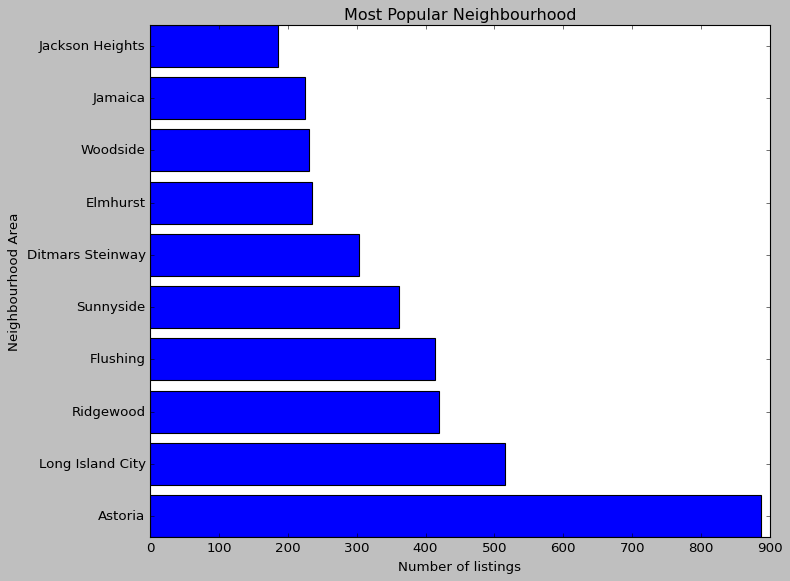

In [109]:
Queens=df.loc[df['neighbourhood_group']=='Queens'].reset_index()
Queens.drop(['index'], axis=1,inplace= True)

data = Queens.neighbourhood.value_counts().head(10)

plt.figure(figsize=(10, 8))
x = list(data.index)
y = list(data.values)

plt.title("Most Popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of listings")

plt.barh(x, y)

<BarContainer object of 10 artists>

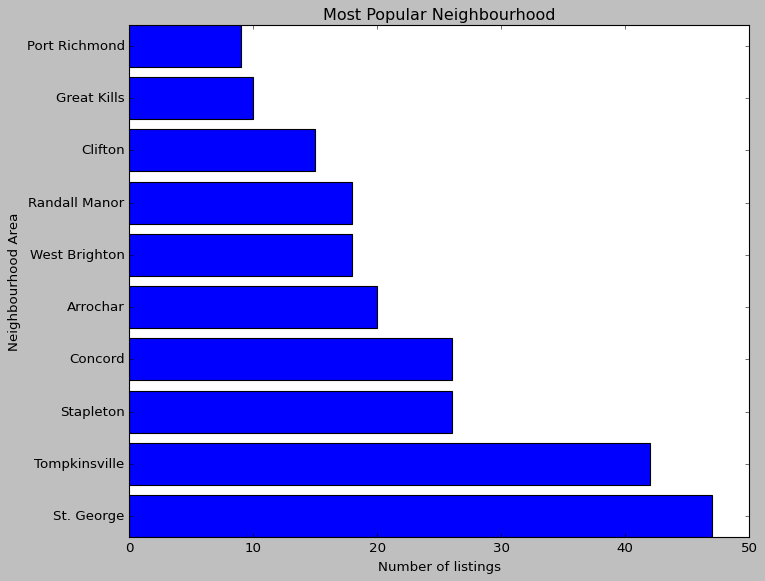

In [110]:
Staten=df.loc[df['neighbourhood_group']=='Staten Island'].reset_index()
Staten.drop(['index'], axis=1,inplace= True)

data = Staten.neighbourhood.value_counts().head(10)

plt.figure(figsize=(10, 8))
x = list(data.index)
y = list(data.values)

plt.title("Most Popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of listings")

plt.barh(x, y)

### **The Traffic in various areas**

From the given data we can infere that the traffic of any particular area might also depend on the number of reviews a particular place has got. We can consider the reviews per month column as a close to accurate measure for the same despite it having null values as it holds the average reviews for a property where as other columns are dependent on the date of last review.

Text(0.5, 0, 'Neighbourhood Group')

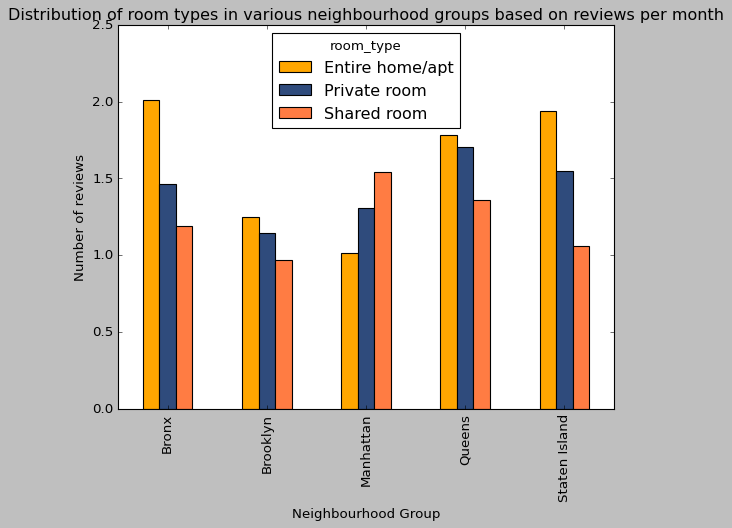

In [111]:
#calculating the type of property which got the most reviews in a particular neighbourhood group.

room_types_neighbourgroup = df.groupby(['neighbourhood_group','room_type'])['reviews_per_month'].mean()
room_types_neighbourgroup.unstack().plot(kind='bar',color = ['#ffa600', '#2f4b7c', '#ff7c43'])

plt.title("Distribution of room types in various neighbourhood groups based on reviews per month")
plt.ylabel("Number of reviews")
plt.xlabel("Neighbourhood Group")

Text(0.5, 0, 'Neighbourhoods')

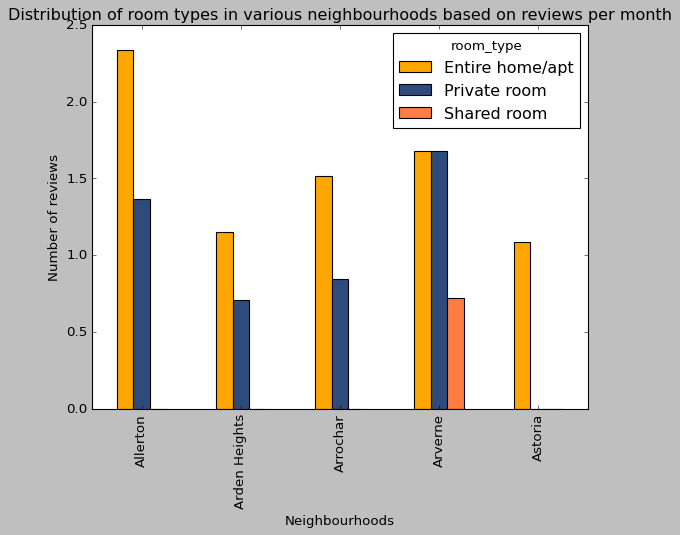

In [112]:
#calculating the type of property which got the most reviews in a particular neighbourhood.

room_types_neighbourhood = df.groupby(['neighbourhood','room_type'])['reviews_per_month'].mean()
neighbourhoood=room_types_neighbourhood.head(10)
m=neighbourhoood.unstack().plot(kind='bar',color = ['#ffa600', '#2f4b7c', '#ff7c43'])

plt.title("Distribution of room types in various neighbourhoods based on reviews per month")
plt.ylabel("Number of reviews")
plt.xlabel("Neighbourhoods")

Text(0.5, 0, 'Neighbourhood groups')

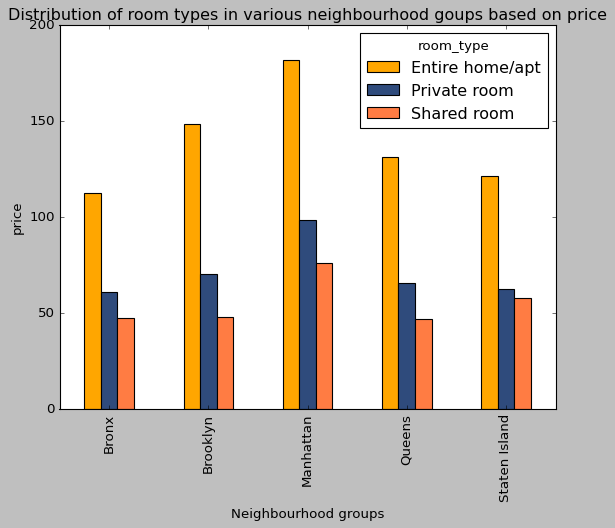

In [113]:
#Checking if price affects the results

room_types_price = df.groupby(['neighbourhood_group','room_type'])['price'].mean()
price_room=room_types_price
price_room.unstack().plot(kind='bar',color = ['#ffa600', '#2f4b7c', '#ff7c43'])

plt.title("Distribution of room types in various neighbourhood goups based on price")
plt.ylabel("price")
plt.xlabel("Neighbourhood groups")

### **Relation between neighbourhood group and availability**

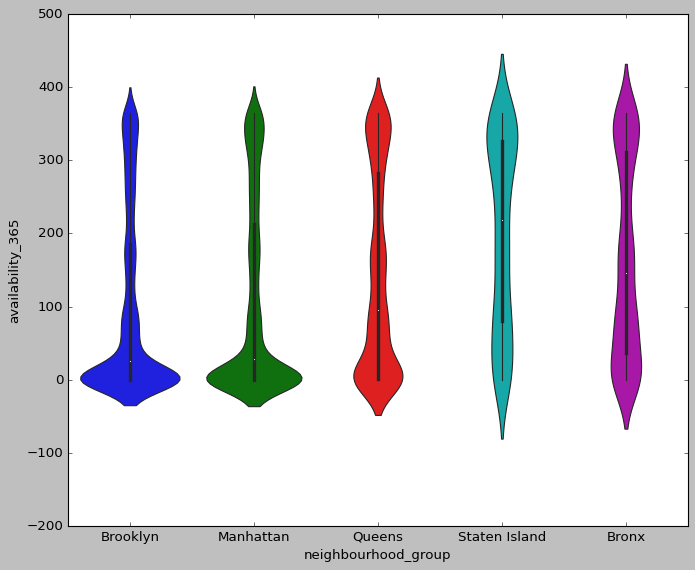

In [114]:
plt.figure(figsize=(10,8))
ax = sns.violinplot(data=df, x="neighbourhood_group", y="availability_365")



Plot shows that Staten Island has the highest mean availability value around 220-250 days compared to others

## **Conclusion**

#### 1. The people who prefer to stay in Entire home or  Apartment they are going to stay bit longer in that particular Neighbourhood only.

#### 2. The people who prefer to stay in Private room they won't stay longer as compared to Home or Apartment.

#### 3. Most people prefer to pay less price.

#### 4. If there are more number of Reviews for particular Neighbourhood group that means that place is a tourist place.

#### 5. We put good use of our latitude and longitude columns and used to create a geographical heatmap color-coded by the price of listings.

#### 6. Except for Manhattan, in all the neighbourhood groups, 'Entire home/apt' is the room type that gets most traffic.


#### 7. We can conclude that throughout NewYork city there is a larger preference towards Entire apt as compared to private or shared rooms irrespective to the prices hence the Traffic there are most.


